<a href="https://colab.research.google.com/github/VictorCalebeIFG/MachineLearning_Python/blob/main/Arvore_de_Decisao_Base_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arvore de Decisão - Base de Credito**

*A intenção é prever a classe default "0"(pago) e "1"(não pago), através da renda ("income") idade("age") e da dívida("loan")*


---



In [2]:
import pandas as pd

data_base = pd.read_csv("/content/credit_data.csv")

data_base.head(2)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0


In [5]:
import pickle

with open("/content/credit.pkl","rb") as f:
    x_cred_treino,y_cred_treino,x_cred_teste,y_cred_teste = pickle.load(f)

In [4]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(criterion = "entropy")

arvore.fit(x_cred_treino,y_cred_treino)

DecisionTreeClassifier(criterion='entropy')

### Previsão:



---



In [7]:
previsoes = arvore.predict(x_cred_teste)

previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Verificando a Acurácia:


*Como pode ser visto abaixo, a acurácia do método foi de 0.98 ,ou seja uma acurácia muito boa, melhor que a do Método de Bayes para o mesmo "Data Set".*


---



In [9]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_cred_teste,previsoes)

accuracy

0.982

### Confusion Matrix:


*No eixo vertical está os valores de teste e no eixo horizontal o valore previsto.*


---



0.982

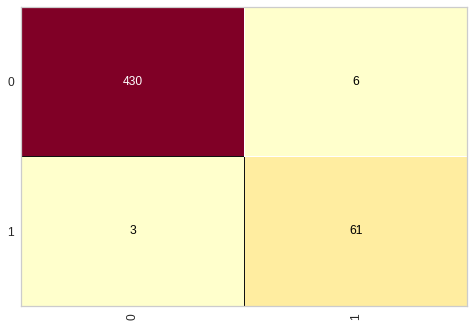

In [10]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore)
cm.fit(x_cred_treino,y_cred_treino)
cm.score(x_cred_teste,y_cred_teste)

### Mostrando a Arvore:

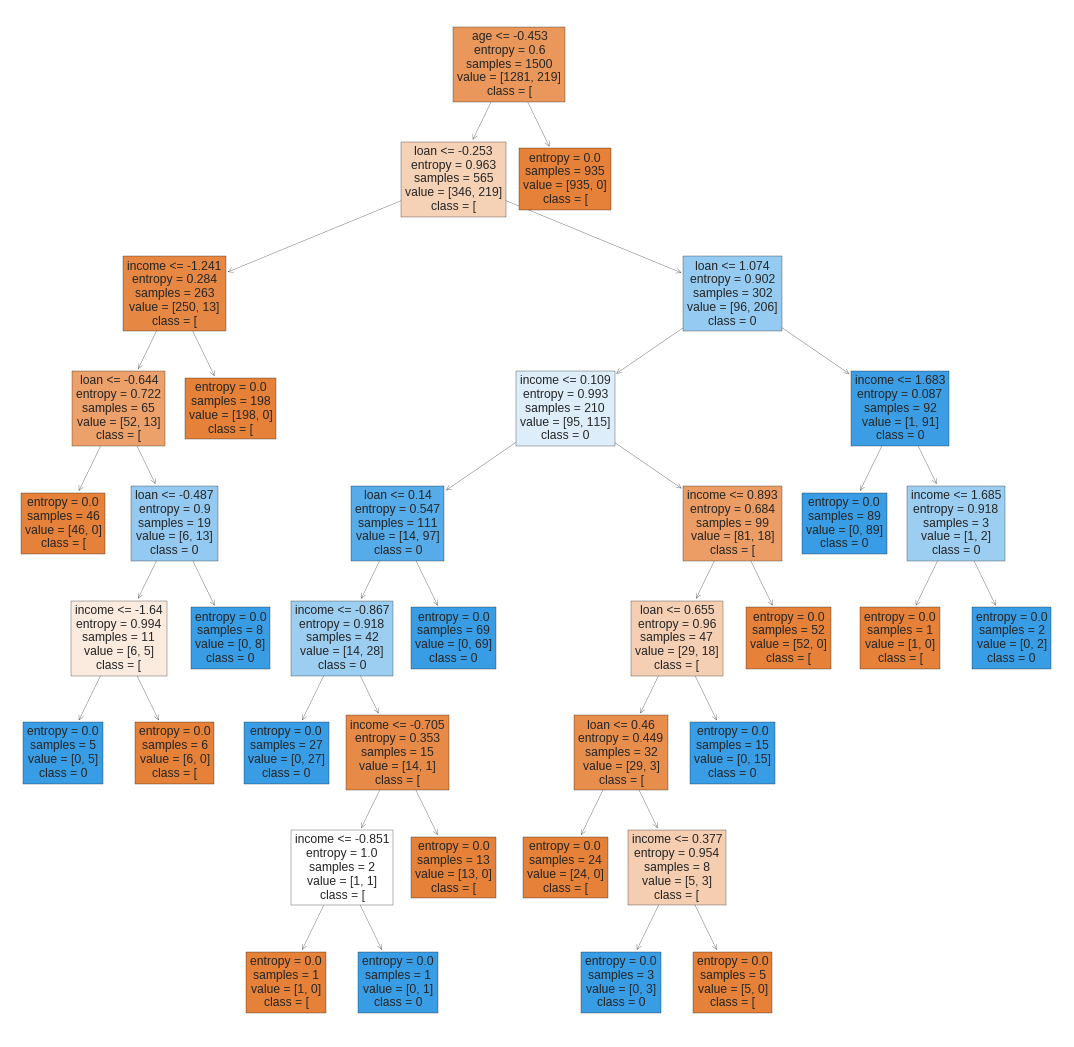

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ["income","age","loan"]
plt.figure(figsize = (19,19))

tree.plot_tree(arvore, feature_names= previsores,
               class_names = str(arvore.classes_),
               filled = True);